## Q3_Revenue_For_ShoppingMall

In [1]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, RFECV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix,r2_score, accuracy_score, classification_report
import seaborn as sn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge,BayesianRidge

In [2]:
url='https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/Shopping_Revenue.csv'
df= pd.read_csv(url)
df.head(10)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715
5,5,2/12/2010,Ankara,Big Cities,FC,6,6.0,4.5,7.5,8,...,5.0,0,0,0,0,0,0,0,0,5017319
6,6,10/11/2010,İstanbul,Big Cities,IL,2,3.0,4.0,4.0,1,...,3.0,4,5,2,2,3,5,4,4,5166635
7,7,6/21/2011,İstanbul,Big Cities,IL,4,5.0,4.0,5.0,2,...,2.0,0,0,0,0,0,0,0,0,4491607
8,8,8/28/2010,Afyonkarahisar,Other,IL,1,1.0,4.0,4.0,1,...,3.0,4,5,5,3,4,5,4,5,4952497
9,9,11/16/2011,Edirne,Other,IL,6,4.5,6.0,7.5,6,...,2.5,0,0,0,0,0,0,0,0,5444227


In [3]:
df['City'].nunique()

34

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          133 non-null    float64
 11  P7          133 non-null    float64
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [5]:
df['P6'] = df['P6'].fillna(0).astype(int)
df['P7'] = df['P7'].fillna(0).astype(int)
df['P2'] = df['P2'].fillna(0).astype(int)
df['P3'] = df['P3'].fillna(0).astype(int)
df['P4'] = df['P4'].fillna(0).astype(int)
df['P13'] = df['P13'].fillna(0).astype(int)
df['P26']= df['P26'].fillna(0).astype(int)
df['P27']=df['P27'].fillna(0).astype(int)
df['P28']=df['P28'].fillna(0).astype(int)
df['P29']=df['P29'].fillna(0).astype(int)

In [6]:
df.shape

(137, 43)

In [7]:
df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [8]:
df['P6'].fillna(df['P6'].mean(),inplace=True)
df['P7'].fillna(df['P7'].mean(),inplace=True)
df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [9]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.350365,4.306569,4.350365,2.007299,3.226277,5.240876,5.153285,5.445255,...,3.065693,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.422463,1.011420,0.974613,1.209620,2.124758,2.439038,1.858567,1.834793,...,1.558678,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.000000,7.000000,7.000000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.000000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [10]:
df['Open Date'] = pd.to_datetime(df['Open Date'])
df['Open Date'] = pd.to_datetime(df['Open Date'], dayfirst=True)

df.head(10)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5,4,4,2,...,3,5,3,4,5,5,4,3,4,5653753
1,1,2008-02-14,Ankara,Big Cities,FC,4,5,4,4,1,...,3,0,0,0,0,0,0,0,0,6923131
2,2,2013-03-09,Diyarbakır,Other,IL,2,4,2,5,2,...,3,0,0,0,0,0,0,0,0,2055379
3,3,2012-02-02,Tokat,Other,IL,6,4,6,6,4,...,7,25,12,10,6,18,12,12,6,2675511
4,4,2009-05-09,Gaziantep,Other,IL,3,4,3,4,2,...,3,5,1,3,2,3,4,3,3,4316715
5,5,2010-02-12,Ankara,Big Cities,FC,6,6,4,7,8,...,5,0,0,0,0,0,0,0,0,5017319
6,6,2010-10-11,İstanbul,Big Cities,IL,2,3,4,4,1,...,3,4,5,2,2,3,5,4,4,5166635
7,7,2011-06-21,İstanbul,Big Cities,IL,4,5,4,5,2,...,2,0,0,0,0,0,0,0,0,4491607
8,8,2010-08-28,Afyonkarahisar,Other,IL,1,1,4,4,1,...,3,4,5,5,3,4,5,4,5,4952497
9,9,2011-11-16,Edirne,Other,IL,6,4,6,7,6,...,2,0,0,0,0,0,0,0,0,5444227


In [11]:
sns.set()

<Figure size 600x600 with 0 Axes>

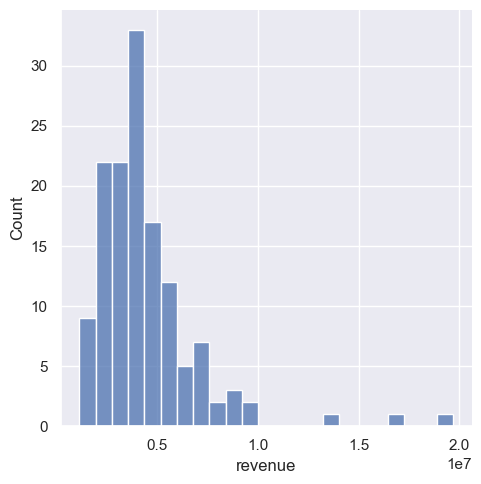

In [12]:
plt.figure(figsize=(6,6))
sns.displot(df['revenue'])
plt.show()

In [13]:
df['Year'] = pd.to_datetime(df['Open Date']).dt.year
df['Month'] = pd.to_datetime(df['Open Date']).dt.month
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P31,P32,P33,P34,P35,P36,P37,revenue,Year,Month
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5,4,4,2,...,3,4,5,5,4,3,4,5653753,1999,7
1,1,2008-02-14,Ankara,Big Cities,FC,4,5,4,4,1,...,0,0,0,0,0,0,0,6923131,2008,2
2,2,2013-03-09,Diyarbakır,Other,IL,2,4,2,5,2,...,0,0,0,0,0,0,0,2055379,2013,3
3,3,2012-02-02,Tokat,Other,IL,6,4,6,6,4,...,12,10,6,18,12,12,6,2675511,2012,2
4,4,2009-05-09,Gaziantep,Other,IL,3,4,3,4,2,...,1,3,2,3,4,3,3,4316715,2009,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008-06-25,Trabzon,Other,FC,2,3,3,5,4,...,0,0,0,0,0,0,0,5787594,2008,6
133,133,2006-10-12,İzmir,Big Cities,FC,4,5,4,4,2,...,0,0,0,0,0,0,0,9262754,2006,10
134,134,2006-07-08,Kayseri,Other,FC,3,4,4,4,2,...,0,0,0,0,0,0,0,2544857,2006,7
135,135,2010-10-29,İstanbul,Big Cities,FC,4,5,4,5,2,...,0,0,0,0,0,0,0,7217634,2010,10


In [14]:
df['Year'].unique() 

array([1999, 2008, 2013, 2012, 2009, 2010, 2011, 2000, 2014, 2006, 1998,
       1996, 2004, 2007, 2005, 2002, 1997], dtype=int64)

In [15]:
df['Year'].sort_values(ascending = True)

35     1996
122    1997
64     1998
83     1998
28     1998
       ... 
10     2013
12     2013
56     2013
21     2014
119    2014
Name: Year, Length: 137, dtype: int64

<Figure size 600x600 with 0 Axes>

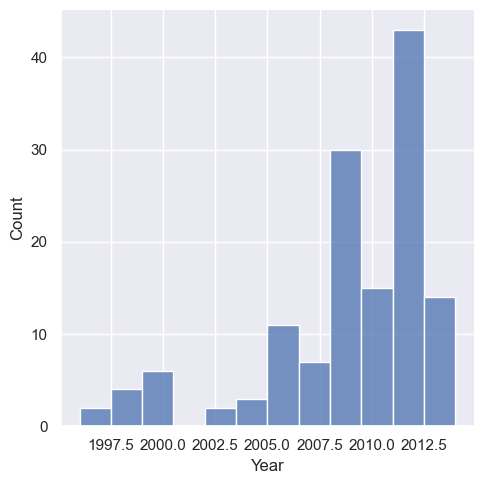

In [16]:
plt.figure(figsize=(6,6))
sns.displot(df['Year'])
plt.show()

<Figure size 600x600 with 0 Axes>

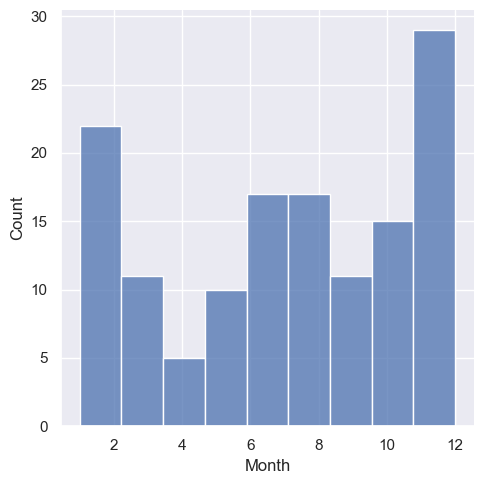

In [17]:
plt.figure(figsize=(6,6))
sns.displot(df['Month'])
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


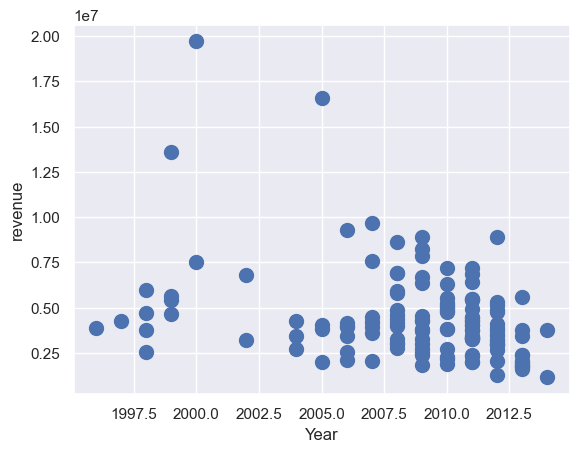

In [18]:
df.plot.scatter(x='Year', y='revenue', s = 100);


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


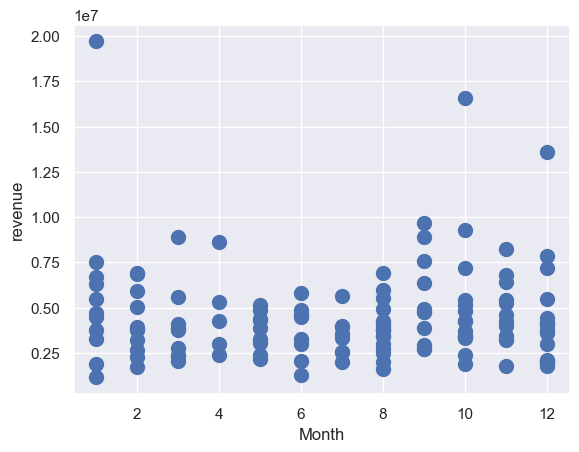

In [19]:
df.plot.scatter(x='Month', y='revenue', s = 100);

In [20]:
df['City']=df['City'].astype('category')
df['City Group']=df['City Group'].astype('category')
  

In [21]:
df['City_new']=df['City'].cat.codes
df['CityGroup_new']=df['City Group'].cat.codes 

In [22]:
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(df[['City_new','CityGroup_new']]).toarray())

In [23]:
New_df=df.join(enc_data)

In [24]:
x=New_df.drop(['Open Date','Id','Type','City','City Group'], axis=1)
y=New_df['revenue'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
print(x_train.shape)
print(x_test.shape)

(109, 78)
(28, 78)


In [26]:
scaler= StandardScaler()
lr= LinearRegression(normalize=True)
pipe = make_pipeline(scaler,lr)
pipe.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [27]:
y_pred_lr = pipe.predict(x_test)
r2_score(y_test,y_pred_lr)

1.0

In [28]:
lasso=Lasso()
pipe = make_pipeline(scaler,lr)

In [29]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [30]:
y_pred_lasso = pipe.predict(x_test)
r2_score(y_test,y_pred_lasso)

1.0

In [31]:
ridge = Ridge()
pipe = make_pipeline(scaler,ridge)
pipe.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [32]:
y_pred_ridge = pipe.predict(x_test)
r2_score(y_test,y_pred_ridge)

0.9993583464294296

In [33]:
model = BayesianRidge()
model.fit(x_train, y_train)

BayesianRidge()

In [34]:
prediction = model.predict(x_test)
print(f"r2 Score Of Test Set : {r2_score(y_test, prediction)}")

r2 Score Of Test Set : 0.9999999999999997
